In [1]:
%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
path = '/home/vzzzz/Downloads/testing_tasks/SO1_remote_task/'
filename_train = 'train.csv'
filename_promo = 'promotion_schedule.csv'
filename_pred_ex = 'prediction_example.csv'

In [4]:
data = pd.read_csv(path + filename_train)

In [5]:
data.head()

,i,j,t,price,advertised
0,4,7,0,2.137451,0
1,6,1,0,0.863341,0
2,8,6,0,0.799155,0
3,8,25,0,3.023893,0
4,9,6,0,0.799155,0


i - consumer
t - week
r - retailer
c - category
j - product

In [6]:
data.dtypes

i               int64
j               int64
t               int64
price         float64
advertised      int64
dtype: object

In [7]:
dlist = []
for c in ['i', 'j', 'price']:
    dlist.append({'column': c,
                  'min': data[c].min(),
                  'max': data[c].max(),
                  'std': data[c].std(),
                  'mean': data[c].mean()})
description = pd.DataFrame(dlist)

In [8]:
description

,column,max,mean,min,std
0,i,1999.00000,1002.827155,0.000000,577.766624
1,j,39.00000,15.191015,0.000000,12.628597
2,price,3.36606,1.409388,0.194431,0.758152


In [9]:
set(data[(data.i == 1)]['j'])

{0, 6, 10, 12, 14, 25, 26, 28, 30, 33, 39}

In [10]:
data[(data.i == 1) & (data.j == 6)]

,i,j,t,price,advertised
9421,1,6,6,0.479493,1
10990,1,6,7,0.799155,0
29616,1,6,19,0.799155,0
35943,1,6,23,0.799155,0
40629,1,6,26,0.799155,0
51551,1,6,33,0.799155,0
59361,1,6,38,0.559408,1
68703,1,6,44,0.799155,0
71816,1,6,46,0.799155,0
73345,1,6,47,0.799155,0


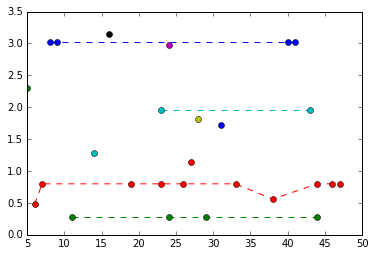

In [11]:
for j in set(data[(data.i == 1)]['j']):
    plt.plot(data[(data.i == 1) & (data.j == j)]['t'], data[(data.i == 1) & (data.j == j)]['price'], 'o--')
plt.show()

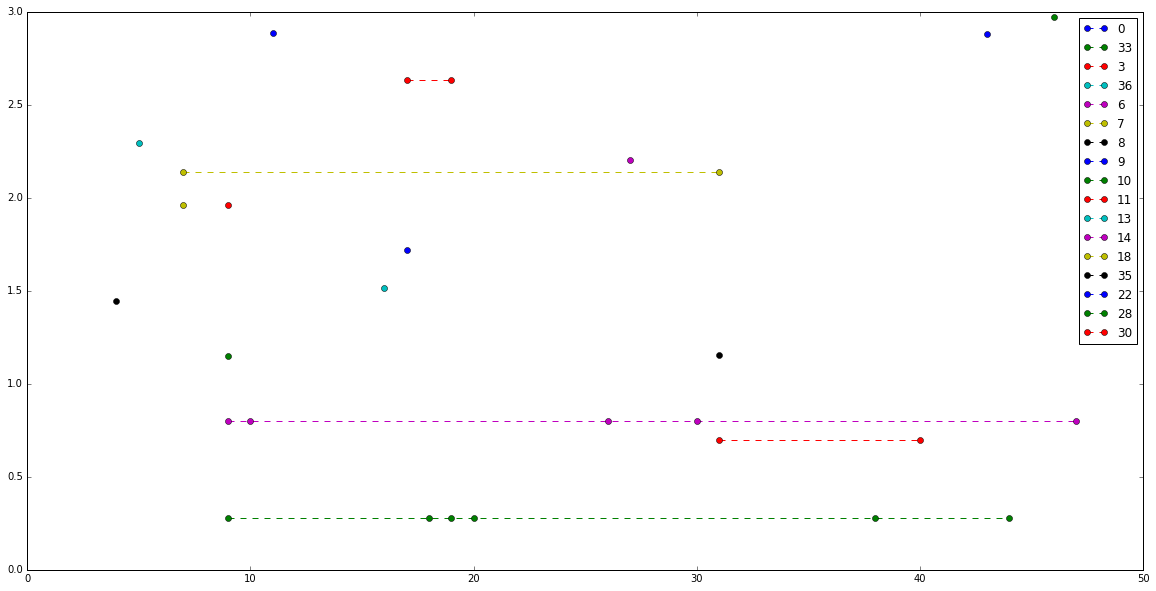

In [12]:
cust = 600
plt.figure(figsize=(20, 10))
labels = []
for j in set(data[(data.i == cust)]['j']):
    plt.plot(data[(data.i == cust) & (data.j == j)]['t'], data[(data.i == cust) & (data.j == j)]['price'], 'o--')
    labels.append(j)
plt.legend(labels)
plt.show()

In [13]:
len(data)

76502

In [14]:
dummies = pd.get_dummies(data['j'], prefix='j')

In [15]:
dummies.as_matrix().shape

(76502, 40)

In [16]:
mx = np.rot90(dummies.as_matrix())

In [17]:
mx.shape

(40, 76502)

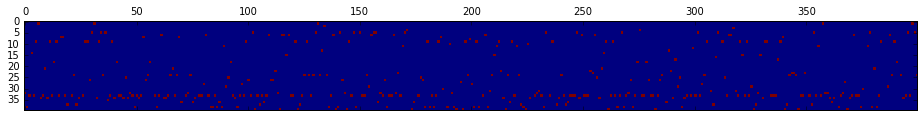

In [18]:
plt.matshow(mx[:,:400])

In [19]:
dummydata = data.drop(['j'], axis=1)

ToDo:
1) Clusterize data few ways:
    1.1) Customers by treir character in consuming
    1.2) Products (whether there are items that are sold similar way)
    1.3) ??? clusters in time
2) Predict data:
    2.1) Provide feature engineering. Add dummies, add features like "frequency", "mean delay before previous buy"
    2.2) Analyze feats. Build correlations, make plots, histograms,..
    2.3) Build "global" regressor for all customers and products
    2.4) Build "custom" regressors for groups of customers, products, etc...

In [25]:
data.head(6)

,i,j,t,price,advertised
0,4,7,0,2.137451,0
1,6,1,0,0.863341,0
2,8,6,0,0.799155,0
3,8,25,0,3.023893,0
4,9,6,0,0.799155,0
5,10,30,0,1.961365,0


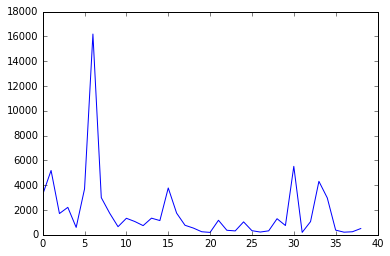

In [35]:
shops = []
for i in range(39):
    shops.append(len(data[data.j == i]))
plt.plot(shops)

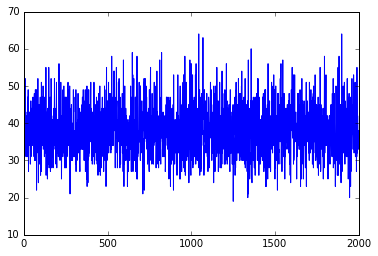

In [37]:
usershopsamount = []
for i in range(2000):
    usershopsamount.append(len(data[data.i == i]))
plt.plot(usershopsamount)

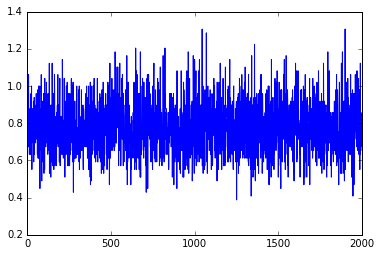

In [40]:
usershopsamountweekly = []
for i in range(2000):
    usershopsamountweekly.append(float(len(data[data.i == i]))/49.0)
plt.plot(usershopsamountweekly)

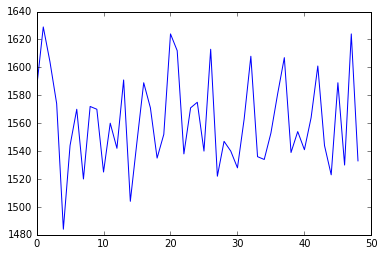

In [39]:
shopsperweek = []
for i in range(49):
    shopsperweek.append(len(data[data.t == i]))
plt.plot(shopsperweek)